In [1]:
import matplotlib.pyplot as plt
import openslide
from openslide import OpenSlide
import cv2
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

需要特别注意的是
1. level_dimensions[level]的计算方式是错误的，建议采用直接除以采样率
2. read_region中的x,y和通常编程中的二维数组的x,y是反的
3. 256对于细胞来说是个较合理的大小

In [2]:
# carryhjr:
# --atention:don't use level_dimensions[level], it's error
class WSI(object):
    def_level = 7
    image_size = 256

    def __init__(self, tumor_path):
        self.wsi_image = OpenSlide(tumor_path)
        self.wsi_height = self.wsi_image.level_dimensions[0][0]
        self.wsi_width = self.wsi_image.level_dimensions[0][1]

    def read_region(self, x, y):
        pic = np.array(self.wsi_image.read_region((x, y), 0, (self.image_size, self.image_size)), dtype='uint8')
        pic = pic[:, :, 0:3]
        return pic
    def read_snapshot(self, level):
        # [n, m] = self.wsi_image.level_dimensions[level]
        n,m = self.wsi_height/(2**level), self.wsi_width/(2**level)
        pic = np.array(self.wsi_image.read_region((0, 0), level, (n, m)))
        return pic

## 验证读取类

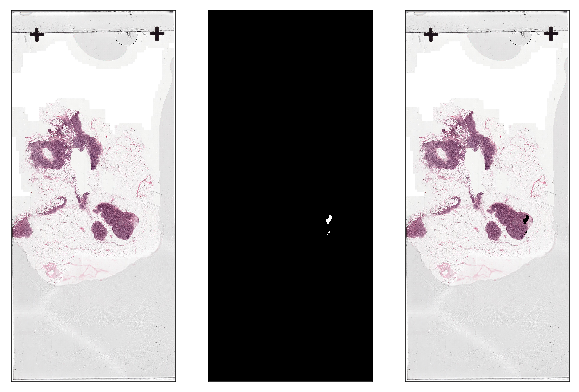

In [91]:
tumor_path = '/home/carry/Documents/data/camelyon16/Tumor_001.tif'
snapshot_6 = WSI(tumor_path).read_snapshot(6)
tumor_mask_path = '/home/carry/Documents/data/camelyon16/Tumor_001_Mask.tif'
snapshot_6_mask = WSI(tumor_mask_path).read_snapshot(6)
plt.subplot(131)
plt.imshow(snapshot_6)
_ = plt.xticks([]),plt.yticks([])
plt.subplot(132)
plt.imshow(snapshot_6_mask)
_ = plt.xticks([]),plt.yticks([])
plt.subplot(133)
snapshot6_mix=cv2.bitwise_and(snapshot_6[:,:,0:3], cv2.bitwise_not(snapshot_6_mask[:,:,0:3]))
plt.imshow(snapshot6_mix)
_ = plt.xticks([]),plt.yticks([])

(1120*64, 1927*64)是numpy数组中白色区域的坐标，64是下采样率，转换到openslide中就是(1120 * 64, 1927 * 64)

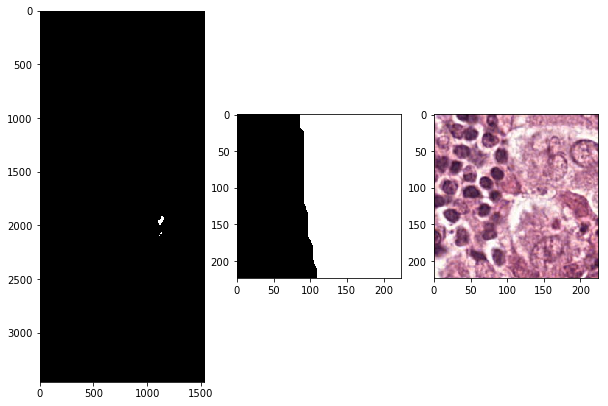

In [92]:
plt.subplot(131)
plt.imshow(snapshot_6_mask)
plt.subplot(132)
pic = WSI(tumor_mask_path).read_region(1120 * 64, 1927 * 64)
plt.imshow(pic)
plt.subplot(133)
pic = WSI(tumor_path).read_region(1120 * 64, 1927 * 64)
plt.imshow(pic)


In [94]:
cv2.imwrite('./test-patch.jpg', pic)

True

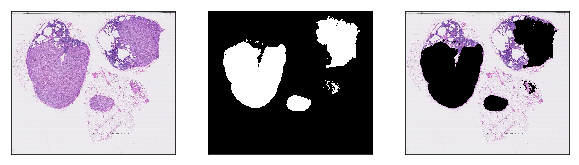

In [3]:
tumor_path = '/home/carry/Documents/data/camelyon16/Tumor_076.tif'
snapshot_6 = WSI(tumor_path).read_snapshot(6)
tumor_mask_path = '/home/carry/Documents/data/camelyon16/Tumor_076_Mask.tif'
snapshot_6_mask = WSI(tumor_mask_path).read_snapshot(6)
plt.subplot(131)
plt.imshow(snapshot_6)
_ = plt.xticks([]),plt.yticks([])
plt.subplot(132)
plt.imshow(snapshot_6_mask)
_ = plt.xticks([]),plt.yticks([])
plt.subplot(133)
snapshot6_mix=cv2.bitwise_and(snapshot_6[:,:,0:3], cv2.bitwise_not(snapshot_6_mask[:,:,0:3]))
plt.imshow(snapshot6_mix)
_ = plt.xticks([]),plt.yticks([])